In [1]:
%matplotlib inline

import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils


In [2]:
# Set up connection to the DB
conn = db.SimpleDatabase('observations.sqlite')
outDir='output'

In [3]:
bundleList = []

slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='az', useCache=False)
stacker = stackers.ZenithDistStacker(altCol='alt')
sql = ''
metric = metrics.CountMetric('mjd', metricName='Nvisits as function of Alt/Az')
plotFuncs = [plots.LambertSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotFuncs=plotFuncs, stackerList=[stacker])
bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir)

In [5]:
group.runAll()

Querying database with no constraint.
Found 2922451 visits
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.
Plotting complete.


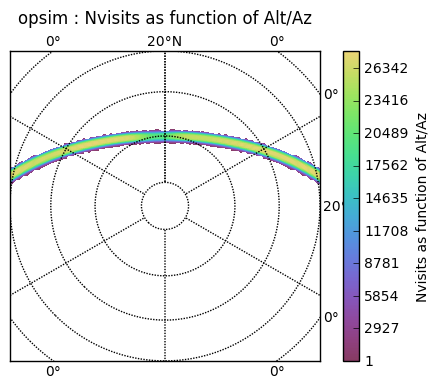

In [6]:
group.plotAll(closefigs=False)